In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools
from tools import cmp

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Chen/chen_11_filtered_mnp_ingested.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 9565 × 2939
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'leiden_R', 'celltypes', 'celltype-immune'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype-immune_colors', 'celltypes_colors', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'rep'

In [5]:
len(list(set(adata.obs['sample'])))

11

In [6]:
adata.obs['celltype-immune'].value_counts()

DC             3369
Mac1           3032
Mono           2042
Mac2           1013
Mac-MT1         108
Mac-cycling       1
Name: celltype-immune, dtype: int64

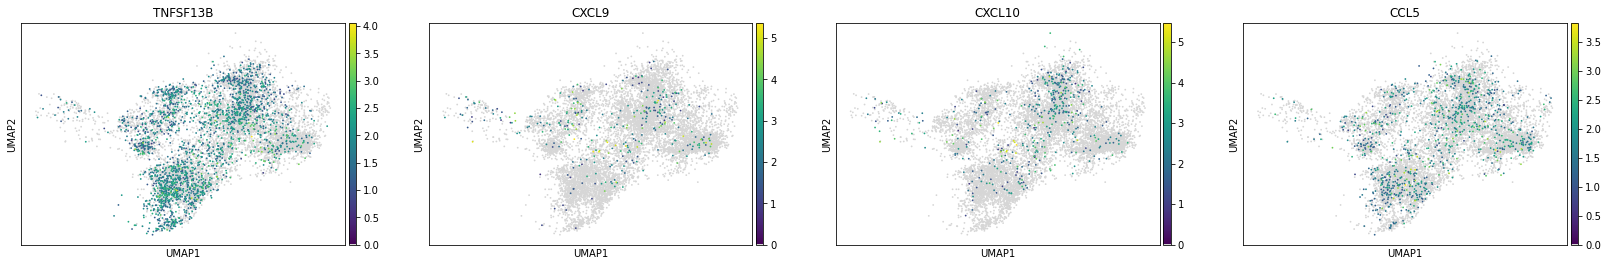

In [3]:
sc.pl.umap(adata, color = ['TNFSF13B', 'CXCL9', 'CXCL10', 'CCL5'], color_map = cmp())

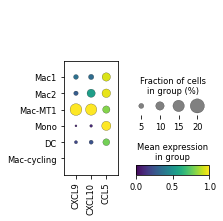

In [4]:
sc.pl.dotplot(adata, ['CXCL9', 'CXCL10', 'CCL5'], groupby = 'celltype-immune', standard_scale = 'var', color_map = 'viridis')